(60000, 784)
(10000, 784)
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3260 - val_loss: 0.1403
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1325 - val_loss: 0.1115
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1096 - val_loss: 0.1010
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1005 - val_loss: 0.0961
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0954 - val_loss: 0.0914
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0918 - val_loss: 0.0886
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0892 - val_loss: 0.0868
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0874 - val_loss: 0.0852
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0858 - val_loss: 0.0838
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0845 - val_loss: 0.0828
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0835 - val_loss: 0.0822
Epoch 12/30
235/235 ━━━━━━

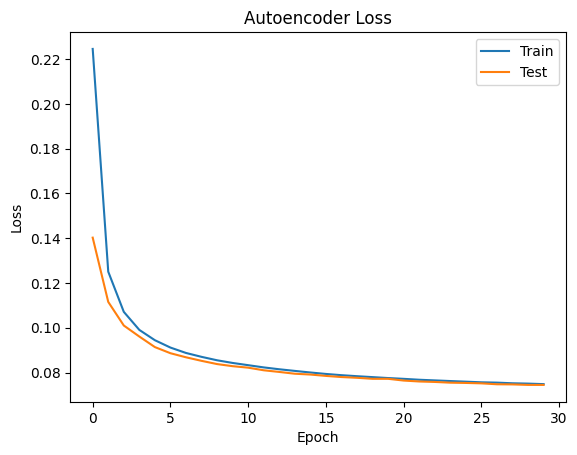

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


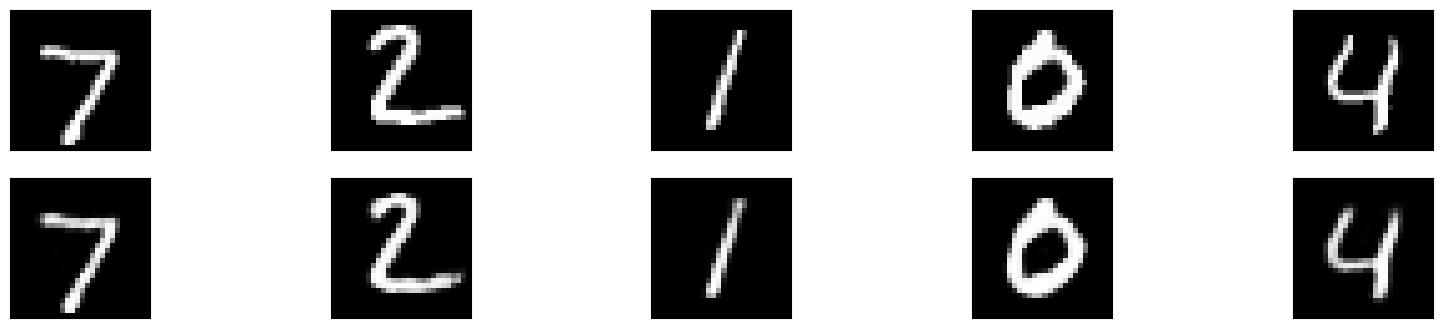

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
K-NN accuracy on encoded data: 96.40%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      1.00      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.95      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.96      0.96      0.96       892
           6       0.97      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.93      0.95       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [2]:
# Import necessary libraries
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np, pandas as pd, matplotlib.pyplot as plt

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Define the Autoencoder
encoding_dim = 64
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Plot accuracy and loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

decoder=Model(encoded,decoded)

encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Encode the data using trained Autoencoder
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test)

# Apply K-NN on encoded data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(encoded_train, y_train)

# Predict labels for test data
y_pred = knn.predict(encoded_test)

# Evaluate the K-NN model
acc = accuracy_score(y_test, y_pred)
print(f"K-NN accuracy on encoded data: {acc * 100:.2f}%")

from sklearn.metrics import classification_report
# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)